In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

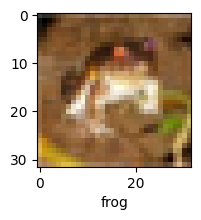

In [8]:
plot_sample(X_train, y_train, 0)


In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

sample ANN

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8087 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6223 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5387 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4804 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4301 - accuracy: 0.4953


In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.58      0.52      1000
           1       0.68      0.51      0.58      1000
           2       0.55      0.10      0.17      1000
           3       0.39      0.25      0.31      1000
           4       0.34      0.59      0.43      1000
           5       0.42      0.34      0.37      1000
           6       0.48      0.60      0.53      1000
           7       0.61      0.46      0.53      1000
           8       0.45      0.76      0.56      1000
           9       0.56      0.52      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4838 - accuracy: 0.4662
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1342 - accuracy: 0.6026
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0038 - accuracy: 0.6503
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9278 - accuracy: 0.6788
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8552 - accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7939 - accuracy: 0.7239
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7398 - accuracy: 0.7445
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6965 - accuracy: 0.7590
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6578 - accuracy: 0.7726
Epoch 10/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.618

In [15]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.9067 - accuracy: 0.7020


[0.9066518545150757, 0.7020000219345093]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.2293318e-03, 1.9622993e-04, 1.2450522e-03, 8.0604756e-01,
        3.5099545e-03, 1.8067166e-01, 2.7665664e-03, 2.4368515e-04,
        1.4640043e-03, 1.6259850e-03],
       [1.5213456e-02, 2.8213561e-01, 5.9473488e-05, 1.7886673e-06,
        6.8363795e-07, 7.1321102e-07, 1.9491800e-07, 5.6090232e-07,
        7.0177156e-01, 8.1587501e-04],
       [2.2610655e-02, 1.4907274e-01, 1.2004621e-03, 4.7074705e-03,
        5.7917979e-04, 1.2445863e-03, 1.3424711e-04, 6.2114437e-04,
        7.8677535e-01, 3.3054169e-02],
       [5.8944720e-01, 2.7127919e-01, 5.2215876e-03, 1.3226356e-05,
        5.5034394e-05, 5.6507465e-06, 4.6509376e-04, 2.6060286e-06,
        1.3341576e-01, 9.4603267e-05],
       [2.4898898e-07, 1.0920003e-05, 5.5663109e-02, 3.1897515e-02,
        5.1872041e-02, 5.2182470e-03, 8.5533637e-01, 9.3256290e-07,
        1.3536636e-07, 4.4273526e-07]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [18]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

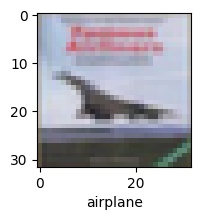

In [19]:
plot_sample(X_test, y_test,3)



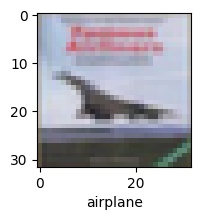

In [20]:
plot_sample(X_test, y_test,3)


In [22]:
classes[y_classes[3]]

'airplane'